In [1]:
import pprint
from collections import defaultdict

import pandas as pd
import numpy as np
import os
import datetime
import yaml
from seaborn import color_palette

from analysis.database import get_config

In [2]:
config = get_config()

df = pd.read_excel(
    f"../data/individual_all_data-{config.version}.xlsx",
    index_col=0,
)
df.head()

,individual_id,sex,publication_id,title,first_author,reference,doi,year,publication_database,resource_uri,...,treatment_taken::Implantable cardioverter-defibrillator,treatment_taken::Left cardiac sympathetic denervation,treatment_taken::Verapamil,effective::Beta blocker,effective::Catheter ablation,effective::Enalapril,effective::Flecainide,effective::Implantable cardioverter-defibrillator,effective::Left cardiac sympathetic denervation,effective::Verapamil
0,1,NaN,1,Familial Evaluation in Catecholaminergic Polym...,Van Der Werf C,NaN,10.1161/CIRCEP.112.970517,2012,PubMed,https://pubmed.ncbi.nlm.nih.gov/22787013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,female,2,Flecainide therapy reduces exercise-induced ve...,"van der Werf, C",NaN,10.1016/j.jacc.2011.01.026,2011,PubMed,https://pubmed.ncbi.nlm.nih.gov/21616285,...,0.0,0.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
2,3,male,3,Structural abnormalities on cardiac magnetic r...,"Gerber, D",NaN,10.1016/j.jacep.2020.03.006,2020,PubMed,https://pubmed.ncbi.nlm.nih.gov/32553227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,female,4,Genetic Background of Catecholaminergic Polymo...,"Kawamura, M",NaN,10.1253/circj.cj-12-1460,2013,PubMed,https://pubmed.ncbi.nlm.nih.gov/23595086,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,male,5,Gender differences in the inheritance mode of ...,"Ohno, S.",NaN,10.1371/journal.pone.0131517,2015,PubMed,https://pubmed.ncbi.nlm.nih.gov/26114861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
colors = config.figure_palette

colors

FigurePalette(default_bar='black', default_hist='lightgrey', default_dot='dimgray', dot_alpha=0.8, box_median_props={'linewidth': 2}, cat_palette='colorblind', text_fontsize=10)

In [4]:
from pathlib import Path

# create dir for figures
figures_dir = Path(
    os.path.join("..", "figures", config.version_for_dir, "analysis_05"))

if not os.path.exists(figures_dir):
    print(f"Creating directory: {figures_dir}")
    os.makedirs(figures_dir)

Creating directory: ../figures/0_3_4/analysis_05


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")

In [6]:
from typing import Literal


def set_figure_size(
        x_label: str,
        y_label: str,
        title_: str,
        x_tick_rotation: int = 0,
        x_tick_ha: Literal["center", "right", "left"] = "center",
        # x_label_fontsize: int = BASE_LABEL_FONT_SIZE,
        # y_label_fontsize: int = BASE_LABEL_FONT_SIZE,
        # title_fontsize: int = BASE_TITLE_FONT_SIZE,
        # x_tick_fontsize: int = BASE_TICK_FONT_SIZE,
        # y_tick_fontsize: int = BASE_TICK_FONT_SIZE,
):
    plt.xlabel(x_label, fontsize=figure_4.x_label_fontsize)
    plt.ylabel(y_label, fontsize=figure_4.y_label_fontsize)
    plt.title(title_, fontsize=figure_4.title_fontsize)
    plt.xticks(rotation=x_tick_rotation, ha=x_tick_ha,
               fontsize=figure_4.x_tick_fontsize)
    plt.yticks(fontsize=figure_4.y_tick_fontsize)
    plt.xticks(rotation=x_tick_rotation, ha=x_tick_ha,
               fontsize=figure_4.x_tick_fontsize)
    plt.tight_layout()


def save_current_plot(name: str):
    for fmt in ["png", "pdf", "svg"]:
        plt.savefig(
            os.path.join(figures_dir, name + '.' + fmt), dpi=300)

# Number of Cases Per Variant

In [7]:
# only consider CPVT patients
df_cpvt = df[
    df["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1
    ]

NUM_TOP_VARIANTS = 20

num_cases_per_variant = pd.DataFrame(
    df_cpvt["p_hgvs_aa1"].value_counts()).reset_index().sort_values(
    by=["count", "p_hgvs_aa1"], ascending=[False, True]
)
num_cases_per_variant = num_cases_per_variant.rename(
    columns={"p_hgvs_aa1": "Variant", "count": "Number of Patients"},
)
num_cases_per_variant.head()

,Variant,Number of Patients
0,G357S,99
1,R420Q,52
2,R420W,27
3,G2337V,23
4,G3946S,20


In [28]:
print(num_cases_per_variant.shape)
print(num_cases_per_variant["Number of Patients"].sum())
print(df_cpvt["p_hgvs_aa1"].nunique())
print(df_cpvt["p_hgvs_string"].nunique())

(263, 2)
937
263
272


In [33]:
from collections import defaultdict

aa_1_to_3 = defaultdict(set)

for _, x in df_cpvt.iterrows():
    if pd.isna(x["p_hgvs_string"]):
        continue

    aa_1_to_3[x["p_hgvs_aa1"]].add(x["p_hgvs_string"])

# filter for where len > 1
aa_1_to_3 = {k: v for k, v in aa_1_to_3.items() if len(v) > 1}
aa_1_to_3

{'S3938G': {'NP_001026.2:p.(Ser3938Gly)', 'NP_001026.2:p.Ser3938Gly'},
 'Q4171H': {'NP_001026.2:p.(Gln4171His)', 'NP_001026.2:p.Gln4171His'},
 'M3999I': {'NP_001026.2:p.(Met3999Ile)', 'NP_001026.2:p.Met3999Ile'},
 'F2215L': {'NP_001026.2:p.(Phe2215Leu)', 'NP_001026.2:p.Phe2215Leu'},
 'E4187K': {'NP_001026.2:p.(Glu4187Lys)', 'NP_001026.2:p.Glu4187Lys'},
 'E2169D': {'NP_001026.2:p.(Glu2169Asp)', 'NP_001026.2:p.Glu2169Asp'},
 'C2402R': {'NP_001026.2:p.(Cys2402Arg)', 'NP_001026.2:p.Cys2402Arg'},
 'A2387T': {'NP_001026.2:p.(Ala2387Thr)', 'NP_001026.2:p.Ala2387Thr'},
 'A2387P': {'NP_001026.2:p.(Ala2387Pro)', 'NP_001026.2:p.Ala2387Pro'}}

In [8]:
pd.DataFrame(
    df_cpvt["p_hgvs_aa1"].value_counts()).reset_index().sort_values(
    by=["count", "p_hgvs_aa1"], ascending=[False, True]
).head(5)["count"].sum() / df_cpvt["p_hgvs_aa1"].value_counts().sum()

0.23585912486659552

In [9]:
num_cases_per_variant.to_csv(
    figures_dir / "top_variants_by_num_cpvt_patients.csv"
)

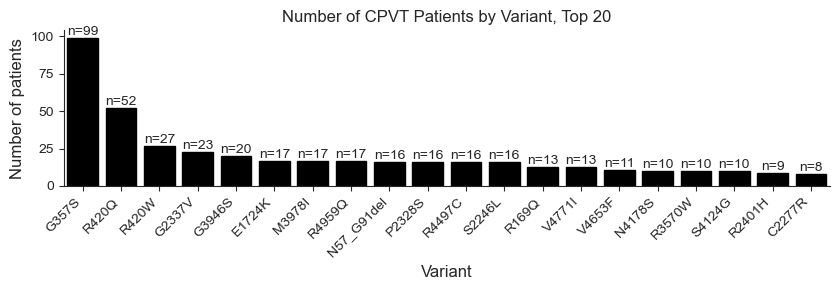

In [10]:
figure_4 = get_config().figure4

sns.set_style("ticks")
plt.figure(figsize=figure_4.fig_size)
ax = sns.barplot(
    data=num_cases_per_variant.head(NUM_TOP_VARIANTS),
    x="Variant",
    y="Number of Patients",
    # color=sns.color_palette("husl", 9)[6],
    color=colors.default_bar,
    legend=False,
    edgecolor="black",  # Specify the color of the border
    # palette=["lightgray" if x % 2 == 0 else "white" for x in range(len(num_cases_per_variant))],
    # hue="Variant",
)

ax.bar_label(ax.containers[0], fontsize=10, fmt="n=%g")

sns.despine()
# plt.title("Number of CPVT1 Cases per Variant")
# plt.xticks(rotation=45, ha="right")  # Rotate labels by 45 degrees
# plt.tight_layout()  # Adjust layout to make room for the rotated labels

set_figure_size(
    figure_4.panels["panel_a"].xlabel,
    figure_4.panels["panel_a"].ylabel,
    figure_4.panels["panel_a"].title,
    x_tick_rotation=45,
    x_tick_ha="right",
)

save_current_plot("num_cases_per_variant")

plt.show()

## Variants Per Exon

Number of unique variants per exon

In [11]:
def get_variants_per_exon(df_input: pd.DataFrame):
    # drop variants without cdna information
    unique_by_variant = df_input.dropna(subset=["c_hgvs_string"])

    unique_by_variant = unique_by_variant.drop_duplicates(
        subset=["c_hgvs_string"]
    )

    # only missense variants
    unique_by_variant = unique_by_variant[
        unique_by_variant["protein_change_type"] == "Substitution"]
    # group by
    unique_by_variant = unique_by_variant.groupby(
        "exon_start"
    ).agg({
        "c_hgvs_string": "nunique"
    })

    unique_by_variant = unique_by_variant.reset_index()
    unique_by_variant.columns = ["exon", "num_uq_variants"]
    unique_by_variant["exon"] = unique_by_variant["exon"].astype(int)
    unique_by_variant = unique_by_variant.sort_values(by="num_uq_variants",
                                                      ascending=False)

    return unique_by_variant


variant_per_exon = get_variants_per_exon(df_cpvt)

# save to csv
variant_per_exon.to_csv(
    figures_dir / "num_variants_per_exon.csv", index=False
)
variant_per_exon.head()

,exon,num_uq_variants
43,90,43
24,47,12
4,8,10
6,14,9
47,94,8


In [12]:
historical_exon_hotspots = {
    # https://color.adobe.com/ryr2-exon-hotspot-color-theme-7ec4acca-8f7f-4a8a-90c9-beca824664fe/
    (3, 15): {"color": "#0EA5E9", "text": "Hotspot I"},
    (44, 50): {"color": "#4ADE80", "text": "Hotspot II"},
    (83, 90): {"color": "#A855F7", "text": "Hotspot III"},
    (93, 105): {"color": "#7DD3FC", "text": "Hotspot IV"},
}

In [13]:
# how many variants within the historical exon hotspots
historic = variant_per_exon[
    variant_per_exon["exon"].isin(
        sum([list(range(start, end + 1)) for start, end in
             historical_exon_hotspots.keys()], [])
    )
]

num_variants_historic = historic["num_uq_variants"].sum()
pct_historic = num_variants_historic / variant_per_exon["num_uq_variants"].sum()

print(f"Number of variants in historical hotspots: {num_variants_historic}")
print(f"Percentage of variants in historical hotspots: {pct_historic:.2%}")

print(historic["exon"].tolist())

Number of variants in historical hotspots: 172
Percentage of variants in historical hotspots: 77.13%
[90, 47, 8, 14, 94, 99, 46, 45, 97, 86, 95, 101, 50, 100, 105, 15, 103, 102, 93, 88, 83, 49, 44, 3, 96, 48, 89, 104, 6, 13, 84]


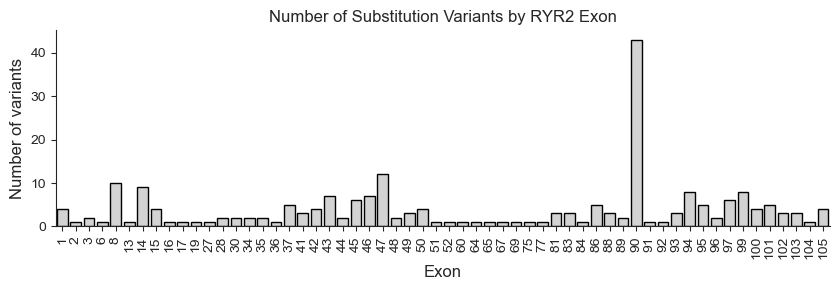

In [14]:
scale_size = 1

plt.figure(figsize=figure_4.fig_size)  # Double the width and height

ax = plt.gca()

# y exons with more than 0 variants
plt_vars = variant_per_exon[variant_per_exon["num_uq_variants"] > 0]

# add historical exon hotspots
#ax.axvspan(3, 15, color=historical_exon_hotspots[(3, 15)], alpha=0.3)


sns.barplot(
    data=variant_per_exon,
    x="exon",
    y="num_uq_variants",
    # palette="pastel",
    # hue='hue',
    # color=sns.color_palette("husl", 9)[6],
    color=colors.default_hist,
    legend=False,
    edgecolor="black",  # Specify the color of the border
    order=plt_vars["exon"].sort_values(),
)
sns.despine()

set_figure_size(
    figure_4.panels["panel_b"].xlabel,
    figure_4.panels["panel_b"].ylabel,
    figure_4.panels["panel_b"].title,
    # double the font size
    x_tick_rotation=90,
)

save_current_plot("num_variants_per_exon")

plt.show()

In [15]:
# Histogram version
# drop variants without cdna information
exon_histogram_df = pd.DataFrame({'exon': range(1, 106)}).set_index(
    "exon").join(variant_per_exon.set_index("exon"),
                 ).fillna(0).reset_index()
# add 0 variants for exons without variants
exon_histogram_df.head()

,exon,num_uq_variants
0,1,4.0
1,2,1.0
2,3,2.0
3,4,0.0
4,5,0.0


105


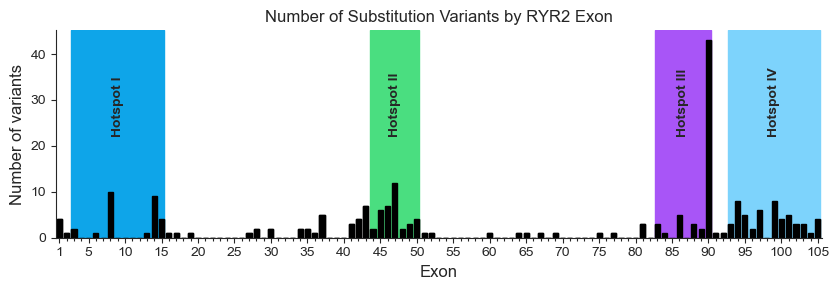

In [16]:
plt.figure(figsize=figure_4.fig_size)

ax = plt.gca()

# Add a rectangle from x=1 to x=10, spanning the full height of the chart
# ax.axvspan(1, 10, color='yellow', alpha=0.3)

BAR_WIDTH = 0.7

figure_4 = get_config().figure4


def make_bar_exons():
    sns.barplot(
        exon_histogram_df,
        x="exon",
        y="num_uq_variants",
        facecolor=colors.default_bar,
        edgecolor="black",
        alpha=1,
        ax=ax,
        width=BAR_WIDTH
    )


make_bar_exons()

bar_positions = [(bar.get_x(), bar.get_x() + bar.get_width()) for bar in
                 ax.patches]

print(len(bar_positions))

for (start, end), color in historical_exon_hotspots.items():
    # print(start, end)
    # print(bar_positions[start - 1], bar_positions[end - 1])
    ax.axvspan(bar_positions[start - 1][0], bar_positions[end - 1][1],
               facecolor=color["color"], edgecolor=color["color"], )

make_bar_exons()

for (start, end), color in historical_exon_hotspots.items():
    start_pos = bar_positions[start - 1][0]
    end_pos = bar_positions[end - 1][1]

    ax.text(
        (start_pos) + (end_pos - start_pos) / 2,
        ax.get_ylim()[1] * .5,
        color["text"],
        horizontalalignment='center',
        fontsize=10,
        weight='bold',
        rotation=90,
    )

# remake the ticks to only show every 5th tick (and 1st tick)
# since this is a bar chart
ax.set_xticks(range(exon_histogram_df["exon"].max()))


def x_major_tick(x_val: int):
    return ((x_val + 0) % 5 == 0) or (x_val == 1) or (
            x_val == exon_histogram_df["exon"].max())


ax.set_xticklabels([
    x if x_major_tick(x) else "" for x in
    range(1, exon_histogram_df["exon"].max() + 1)
])

set_figure_size(
    figure_4.panels["panel_b"].xlabel,
    figure_4.panels["panel_b"].ylabel,
    figure_4.panels["panel_b"].title,
    # x_tick_rotation=90,
)

#print(ax.get_xticklines()[200].get_xdata())

for tick in ax.get_xticklines():
    if not x_major_tick(tick.get_xdata()[0] + 1):
        tick.set_markersize(2)

sns.despine()

# plt.grid(True)

save_current_plot("num_variants_per_exon_hist")

plt.show()

In [17]:
# print number of exons
len(variant_per_exon)

58

## Frequency

In [18]:
cases_per_variant_freq = pd.DataFrame(
    df_cpvt["p_hgvs_string"].value_counts()).reset_index().sort_values(
    by=["count", "p_hgvs_string"], ascending=[False, True]
)["count"].value_counts()

cases_per_variant_freq.rename(
    "Number of Variants",
    inplace=True,
)

cases_per_variant_freq = pd.DataFrame(cases_per_variant_freq).reset_index()

cases_per_variant_freq.columns = ["Number of Patients", "Number of Variants"]

cases_per_variant_freq.head()

,Number of Patients,Number of Variants
0,1,142
1,2,44
2,3,24
3,4,19
4,5,9


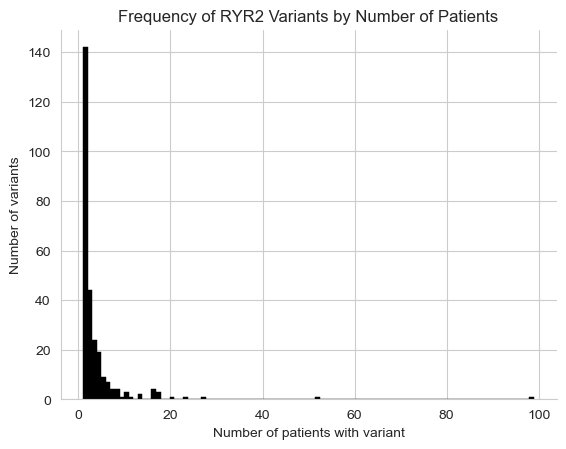

In [19]:
sns.histplot(
    x="Number of Patients",
    data=cases_per_variant_freq,
    weights="Number of Variants",
    color="black",
    bins=cases_per_variant_freq["Number of Patients"].max(),
    kde=False,
    edgecolor="black",
    alpha=1
)

plt.title("Frequency of RYR2 Variants by Number of Patients")
plt.xlabel("Number of patients with variant")
plt.ylabel("Number of variants")

sns.despine()

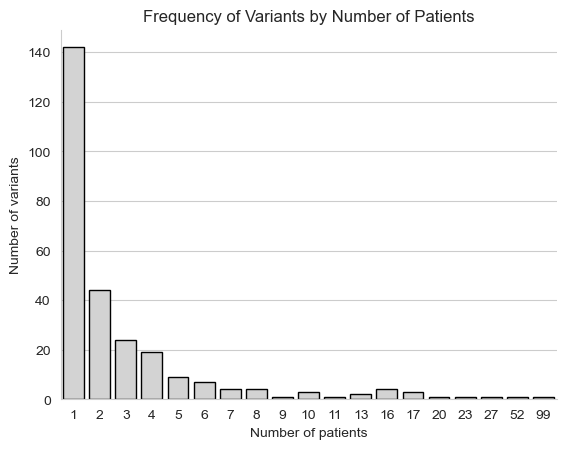

In [20]:
sns.barplot(cases_per_variant_freq,
            x="Number of Patients",
            y="Number of Variants",
            # color=sns.color_palette("husl", 9)[6],
            color=colors.default_hist,
            legend=False,
            edgecolor="black",  # Specify the color of the border)
            )
sns.despine()
# sns.histplot(
#     cases_per_variant_freq,
#     color="black",
#     bins=cases_per_variant_freq.max(),
#     kde=False,
#     edgecolor="black",
# )
plt.title("Frequency of Variants by Number of Patients")
plt.xlabel("Number of patients")
plt.ylabel("Number of variants")
plt.savefig(
    os.path.join(figures_dir, "variant_freq_vs_num_patients.pdf"), dpi=300)
plt.show()

## Report

In [21]:
foo = num_cases_per_variant["Number of Patients"].quantile([0.25, 0.5, 0.75])
print(foo)

0.25    1.0
0.50    2.0
0.75    3.0
Name: Number of Patients, dtype: float64


In [22]:
lt_3_patients = num_cases_per_variant[
                    num_cases_per_variant['Number of Patients'] <= 3].shape[0] / \
                num_cases_per_variant.shape[0]
lt_3_patients

0.7642585551330798

In [23]:
from analysis.write_report import write_sections_to_pdf, PdfSection
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

TOP_N_REPORT = 5

top_n_pct_cases = pd.DataFrame(
    df_cpvt["p_hgvs_aa1"].value_counts()).reset_index().sort_values(
    by=["count", "p_hgvs_aa1"], ascending=[False, True]
).head(TOP_N_REPORT)["count"].sum() / df_cpvt["p_hgvs_aa1"].value_counts().sum()

mode_cases_variant_pct = num_cases_per_variant[
                             num_cases_per_variant['Number of Patients'] ==
                             num_cases_per_variant[
                                 'Number of Patients'].mode().values[0]
                             ]["Number of Patients"].sum() / \
                         num_cases_per_variant["Number of Patients"].sum()

report_list = [
    PdfSection(
        section="Variant Distribution (Protein Coding)",
        stuff=[
            f"Top 5 variants by number of cases",
            num_cases_per_variant.head(
                TOP_N_REPORT
            ),
            f"These account for {top_n_pct_cases:.2%} of all cases",
            f"Median number of cases per variant: {num_cases_per_variant['Number of Patients'].median()}",
            f"Mode number of cases per variant: {num_cases_per_variant['Number of Patients'].mode().values[0]}",
            f"The mode accounts for {mode_cases_variant_pct:.2%} of all cases",
            f"Quantiles of number of cases per variant: {foo.values}",
            f"The Q3 accounts for {lt_3_patients:.2%} of all variants",
        ]
    ),
    PdfSection(
        section="Transcript Distribution (cDNA)",
        stuff=[
            f"Number of unique variants per exon",
            variant_per_exon.head(
                TOP_N_REPORT
            ),
            f"Number of variants in historical hotspots: {num_variants_historic}",
            f"Percentage of variants in historical hotspots: {pct_historic:.2%}",
            f"Median number of variants per exon: {variant_per_exon['num_uq_variants'].median()}",
            f"Mode number of variants per exon: {variant_per_exon['num_uq_variants'].mode().values[0]}",
        ]
    )
]

# report
pdf_name = figures_dir / "variant_distribution_report.pdf"

# Create PDF and write content
c = canvas.Canvas(str(pdf_name), pagesize=A4)
write_sections_to_pdf(c, report_list)
c.save()

print(f"PDF saved to {pdf_name}")

PDF saved to ../figures/0_3_4/analysis_05/variant_distribution_report.pdf
